In [1]:
%matplotlib notebook

In [2]:
#import dependencies 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import datetime as dt
import time

#create file path
filename = "../Resources/NoHo_Street_Traffic_Collision_Data_2015_2019_v2.csv"
traffic_df = pd.read_csv(filename, sep=",", parse_dates=['Date Reported', 'Date Occurred', 'Time Occurred'], \
                         infer_datetime_format=['Date Reported', 'Date Occurred','Time Occurred'], low_memory=False)

#Attempting to adjust time entries to float for use
# traffic_df['Time Occurred'] = traffic_df['Time Occurred'].astype(str).astype(float)
# traffic_df.info()

# traffic_df["Time Occurred"]=str(traffic_df["Time Occurred"])
# traffic_df["Time Occurred"].replace(".",":")

#Convert to integers for calculations
traffic_df['Time Occurred'] = (traffic_df['Time Occurred'].astype(int))/100
traffic_df.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Reporting District,Address,Cross Street,Location,MO Codes
0,151511105,2015-05-08,2015-05-08,0.01,1599,BARBARA CT,DOS PALOS DR,"(34.1271, -118.3479)",3006 3030 3028 3101 3401 3701 4026 3037
1,161504186,2016-01-05,2016-01-04,0.01,1599,VENTURA BL,BROADLAWN DR,"(34.1284, -118.3568)",3006 3028 3030 3037 3101 3401 3701 4026
2,181508642,2018-03-29,2018-03-20,0.01,1599,REGAL PL,CAHUENGA BL,"(34.135, -118.3611)",3037 3006 3030 3028 3101 3401 3701 4026
3,151516620,2015-08-16,2015-08-08,0.01,1588,HILLOCK DR,BLAIR DR,"(34.1366, -118.3432)",3037 3030 3028 3101 3401 3701 4026 3006
4,171520919,2017-10-22,2017-10-22,0.01,1599,CAHUENGA,LANKERSHIM,"(34.1372, -118.3633)",1501 3004 3036 3030 3028 3101 3401 3701 4015


In [3]:
#Reducing df to necessary elements
traffic_df2 = traffic_df.drop(['Date Reported','Address','Cross Street','Location','MO Codes'],axis =1)
traffic_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13072 entries, 0 to 13071
Data columns (total 4 columns):
DR Number             13072 non-null int64
Date Occurred         13072 non-null datetime64[ns]
Time Occurred         13072 non-null float64
Reporting District    13072 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 408.6 KB


In [4]:
# 2015-2019 - CONVERTING TO DATE AND ADDING COLUMNS FOR YEAR, MONTH, AND DAY
traffic_df2['Date Occurred'] = pd.to_datetime(traffic_df2['Date Occurred'])
traffic_df2['Year'] = traffic_df2['Date Occurred'].dt.year
traffic_df2['Month'] = traffic_df2['Date Occurred'].dt.month
traffic_df2['Year'] = traffic_df2['Date Occurred'].dt.year
traffic_df2['Day'] = traffic_df2['Date Occurred'].dt.dayofweek
traffic_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13072 entries, 0 to 13071
Data columns (total 7 columns):
DR Number             13072 non-null int64
Date Occurred         13072 non-null datetime64[ns]
Time Occurred         13072 non-null float64
Reporting District    13072 non-null int64
Year                  13072 non-null int64
Month                 13072 non-null int64
Day                   13072 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 715.0 KB


In [5]:
# CREATING BINS FOR PERIODS OF THE DAY (hour increments); ADDING COLUMN
bins =[0,4.00,8.00,12.00,16.00,20.00,24.00]
labels = ['Midnight - 4am', '4am - 8am', '8am - 12pm', '12pm - 4pm', '4pm - 8pm', '8pm - Midnight']

traffic_df2['Time Period'] = pd.cut(traffic_df2['Time Occurred'], bins, labels=labels)
traffic_df2.sort_values(['Time Period'])
traffic_df2.head()

,DR Number,Date Occurred,Time Occurred,Reporting District,Year,Month,Day,Time Period
0,151511105,2015-05-08,0.01,1599,2015,5,4,Midnight - 4am
1,161504186,2016-01-04,0.01,1599,2016,1,0,Midnight - 4am
2,181508642,2018-03-20,0.01,1599,2018,3,1,Midnight - 4am
3,151516620,2015-08-08,0.01,1588,2015,8,5,Midnight - 4am
4,171520919,2017-10-22,0.01,1599,2017,10,6,Midnight - 4am


In [6]:
# SLICE BY YEAR; 
yr15 = traffic_df2[traffic_df2['Date Occurred'].dt.year == 2015]
yr16 = traffic_df2[traffic_df2['Date Occurred'].dt.year == 2016]
yr17 = traffic_df2[traffic_df2['Date Occurred'].dt.year == 2017]
yr18 = traffic_df2[traffic_df2['Date Occurred'].dt.year == 2018]
yr19 = traffic_df2[traffic_df2['Date Occurred'].dt.year == 2019]

# # 2015-2019 - TOTAL COLLISIONS PER YEAR AND SUM
yr15_ct = yr15['DR Number'].count()
yr16_ct = yr16['DR Number'].count()
yr17_ct = yr17['DR Number'].count()
yr18_ct = yr18['DR Number'].count()
yr19_ct = yr19['DR Number'].count()
yoy_ct = [yr15_ct, yr16_ct, yr17_ct, yr18_ct, yr19_ct]
yoy_ct

[2549, 2642, 2703, 2558, 2620]

In [7]:
# COLLISIONS PER YEAR (DATAFRAME)
y_dex = ['Years']

col_x_yr_df = pd.DataFrame({
                            '2015': yr15_ct,
                            '2016': yr16_ct,
                            '2017': yr17_ct,
                            '2018': yr18_ct,
                            '2019': yr19_ct    
                            }, index = y_dex)

col_x_yr_df

,2015,2016,2017,2018,2019
Years,2549,2642,2703,2558,2620


<IPython.core.display.Javascript object>


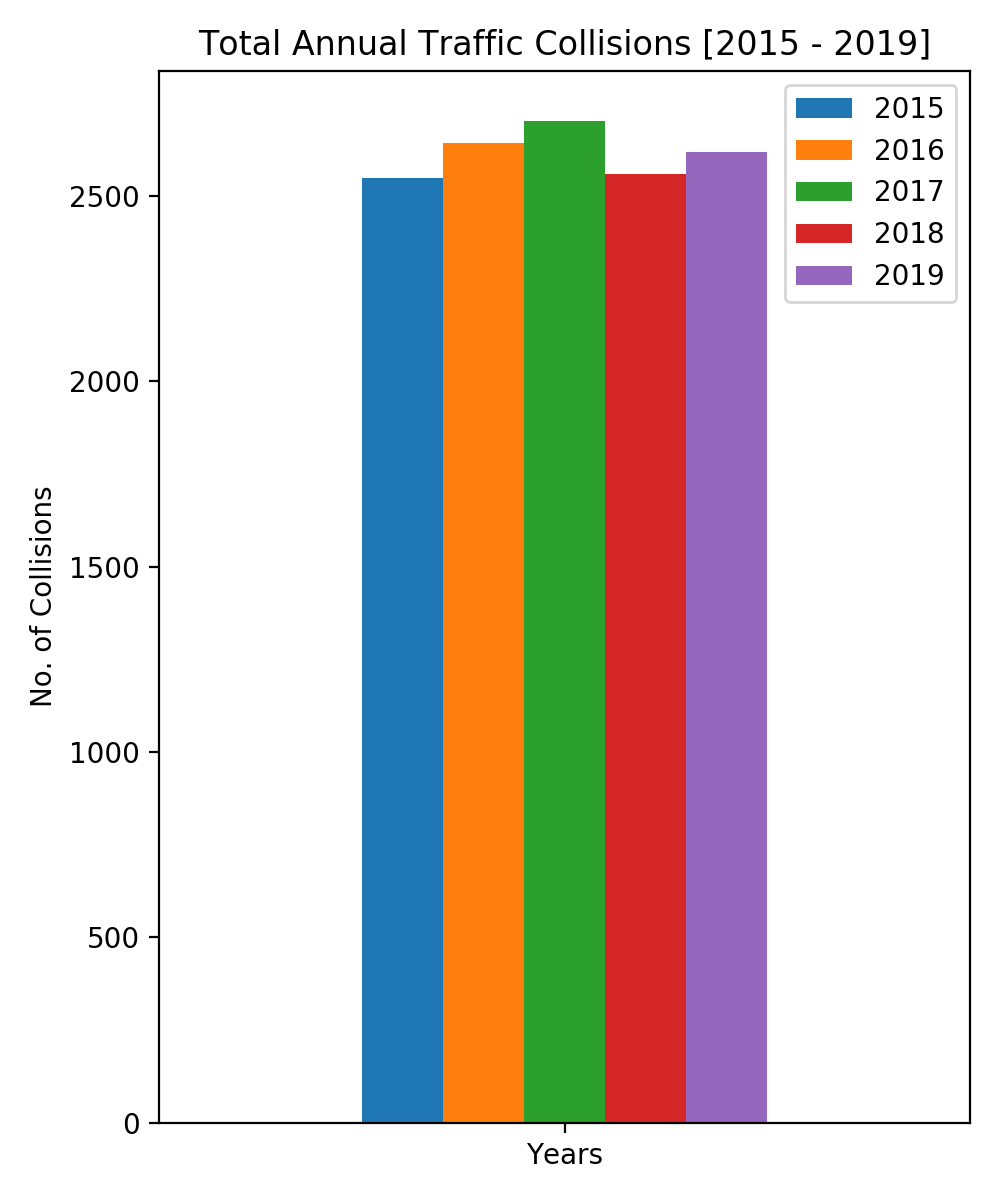

In [63]:
annual_collisions = col_x_yr_df.plot.bar(figsize=(5,6),rot=0, title = 'Total Annual Traffic Collisions [2015 - 2019]')
annual_collisions.set_ylabel('No. of Collisions')
plt.tight_layout()

In [9]:
# 2015 (COLLISIONS PER MONTH)
Jan15 = yr15[yr15['Date Occurred'].dt.month == 1]
Jan15_cts = len(Jan15)

Feb15 = yr15[yr15['Date Occurred'].dt.month == 2]
Feb15_cts = len(Feb15)

Mar15 = yr15[yr15['Date Occurred'].dt.month == 3]
Mar15_cts = len(Mar15)

Apr15 = yr15[yr15['Date Occurred'].dt.month == 4]
Apr15_cts = len(Apr15)

May15 = yr15[yr15['Date Occurred'].dt.month == 5]
May15_cts = len(May15)

Jun15 = yr15[yr15['Date Occurred'].dt.month == 6]
Jun15_cts = len(Jun15)

Jul15 = yr15[yr15['Date Occurred'].dt.month == 7]
Jul15_cts = len(Jul15)

Aug15 = yr15[yr15['Date Occurred'].dt.month == 8]
Aug15_cts = len(Aug15)

Sep15 = yr15[yr15['Date Occurred'].dt.month == 9]
Sep15_cts = len(Sep15)

Oct15 = yr15[yr15['Date Occurred'].dt.month == 10]
Oct15_cts = len(Oct15)

Nov15 = yr15[yr15['Date Occurred'].dt.month == 11]
Nov15_cts = len(Nov15)

Dec15 = yr15[yr15['Date Occurred'].dt.month == 12]
Dec15_cts = len(Dec15)

mo_data_15 = [Jan15_cts, Feb15_cts, Mar15_cts, Apr15_cts, May15_cts, Jun15_cts, 
              Jul15_cts, Aug15_cts, Sep15_cts, Oct15_cts, Nov15_cts, Dec15_cts]

In [10]:
# 2016 (COLLISIONS PER MONTH)
Jan16 = yr16[yr16['Date Occurred'].dt.month == 1]
Jan16_cts = len(Jan16)

Feb16 = yr16[yr16['Date Occurred'].dt.month == 2]
Feb16_cts = len(Feb16)

Mar16 = yr16[yr16['Date Occurred'].dt.month == 3]
Mar16_cts = len(Mar16)

Apr16 = yr16[yr16['Date Occurred'].dt.month == 4]
Apr16_cts = len(Apr16)

May16 = yr16[yr16['Date Occurred'].dt.month == 5]
May16_cts = len(May16)

Jun16 = yr16[yr16['Date Occurred'].dt.month == 6]
Jun16_cts = len(Jun16)

Jul16 = yr16[yr16['Date Occurred'].dt.month == 7]
Jul16_cts = len(Jul16)

Aug16 = yr16[yr16['Date Occurred'].dt.month == 8]
Aug16_cts = len(Aug16)

Sep16 = yr16[yr16['Date Occurred'].dt.month == 9]
Sep16_cts = len(Sep16)

Oct16 = yr16[yr16['Date Occurred'].dt.month == 10]
Oct16_cts = len(Oct16)

Nov16 = yr16[yr16['Date Occurred'].dt.month == 11]
Nov16_cts = len(Nov16)

Dec16 = yr16[yr16['Date Occurred'].dt.month == 12]
Dec16_cts = len(Dec16)

mo_data_16 = [Jan16_cts, Feb16_cts, Mar16_cts, Apr16_cts, May16_cts, Jun16_cts, 
              Jul16_cts, Aug16_cts, Sep16_cts, Oct16_cts, Nov16_cts, Dec16_cts]

In [11]:
# 2017 (COLLISIONS PER MONTH)
Jan17 = yr17[yr17['Date Occurred'].dt.month == 1]
Jan17_cts = len(Jan17)

Feb17 = yr17[yr17['Date Occurred'].dt.month == 2]
Feb17_cts = len(Feb17)

Mar17 = yr17[yr17['Date Occurred'].dt.month == 3]
Mar17_cts = len(Mar17)

Apr17 = yr17[yr17['Date Occurred'].dt.month == 4]
Apr17_cts = len(Apr17)

May17 = yr17[yr17['Date Occurred'].dt.month == 5]
May17_cts = len(May17)

Jun17 = yr17[yr17['Date Occurred'].dt.month == 6]
Jun17_cts = len(Jun17)

Jul17 = yr17[yr17['Date Occurred'].dt.month == 7]
Jul17_cts = len(Jul17)

Aug17 = yr17[yr17['Date Occurred'].dt.month == 8]
Aug17_cts = len(Aug17)

Sep17 = yr17[yr17['Date Occurred'].dt.month == 9]
Sep17_cts = len(Sep17)

Oct17 = yr17[yr17['Date Occurred'].dt.month == 10]
Oct17_cts = len(Oct17)

Nov17 = yr17[yr17['Date Occurred'].dt.month == 11]
Nov17_cts = len(Nov17)

Dec17 = yr17[yr17['Date Occurred'].dt.month == 12]
Dec17_cts = len(Dec17)

mo_data_17 = [Jan17_cts, Feb17_cts, Mar17_cts, Apr17_cts, May17_cts, Jun17_cts, 
              Jul17_cts, Aug17_cts, Sep17_cts, Oct17_cts, Nov17_cts, Dec17_cts]

In [12]:
# 2018 (COLLISIONS PER MONTH)
Jan18 = yr18[yr18['Date Occurred'].dt.month == 1]
Jan18_cts = len(Jan18)

Feb18 = yr18[yr18['Date Occurred'].dt.month == 2]
Feb18_cts = len(Feb18)

Mar18 = yr18[yr18['Date Occurred'].dt.month == 3]
Mar18_cts = len(Mar18)

Apr18 = yr18[yr18['Date Occurred'].dt.month == 4]
Apr18_cts = len(Apr18)

May18 = yr18[yr18['Date Occurred'].dt.month == 5]
May18_cts = len(May18)

Jun18 = yr18[yr18['Date Occurred'].dt.month == 6]
Jun18_cts = len(Jun18)

Jul18 = yr18[yr18['Date Occurred'].dt.month == 7]
Jul18_cts = len(Jul18)

Aug18 = yr18[yr18['Date Occurred'].dt.month == 8]
Aug18_cts = len(Aug18)

Sep18 = yr18[yr18['Date Occurred'].dt.month == 9]
Sep18_cts = len(Sep18)

Oct18 = yr18[yr18['Date Occurred'].dt.month == 10]
Oct18_cts = len(Oct18)

Nov18 = yr18[yr18['Date Occurred'].dt.month == 11]
Nov18_cts = len(Nov18)

Dec18 = yr18[yr18['Date Occurred'].dt.month == 12]
Dec18_cts = len(Dec18)

mo_data_18 = [Jan18_cts, Feb18_cts, Mar18_cts, Apr18_cts, May18_cts, Jun18_cts, 
              Jul18_cts, Aug18_cts, Sep18_cts, Oct18_cts, Nov18_cts, Dec18_cts]

In [13]:
# 2019 (COLLISIONS PER MONTH)
Jan19 = yr19[yr19['Date Occurred'].dt.month == 1]
Jan19_cts = len(Jan19)

Feb19 = yr19[yr19['Date Occurred'].dt.month == 2]
Feb19_cts = len(Feb19)

Mar19 = yr19[yr19['Date Occurred'].dt.month == 3]
Mar19_cts = len(Mar19)

Apr19 = yr19[yr19['Date Occurred'].dt.month == 4]
Apr19_cts = len(Apr19)

May19 = yr19[yr19['Date Occurred'].dt.month == 5]
May19_cts = len(May19)

Jun19 = yr19[yr19['Date Occurred'].dt.month == 6]
Jun19_cts = len(Jun19)

Jul19 = yr19[yr19['Date Occurred'].dt.month == 7]
Jul19_cts = len(Jul19)

Aug19 = yr19[yr19['Date Occurred'].dt.month == 8]
Aug19_cts = len(Aug19)

Sep19 = yr19[yr19['Date Occurred'].dt.month == 9]
Sep19_cts = len(Sep19)

Oct19 = yr19[yr19['Date Occurred'].dt.month == 10]
Oct19_cts = len(Oct19)

Nov19 = yr19[yr19['Date Occurred'].dt.month == 11]
Nov19_cts = len(Nov19)

Dec19 = yr19[yr19['Date Occurred'].dt.month == 12]
Dec19_cts = len(Dec19)

mo_data_19 = [Jan19_cts, Feb19_cts, Mar19_cts, Apr19_cts, May19_cts, Jun19_cts, 
              Jul19_cts, Aug19_cts, Sep19_cts, Oct19_cts, Nov19_cts, Dec19_cts]

In [14]:
# YEARS BY MONTH (DATAFRAME)
m_dex = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
yr_x_mo_df = pd.DataFrame({
                        '2015': mo_data_15,
                        '2016': mo_data_16,
                        '2017': mo_data_17,
                        '2018': mo_data_18,
                        '2019': mo_data_19
                       },index = m_dex)
yr_x_mo_df

,2015,2016,2017,2018,2019
Jan,194,169,239,203,212
Feb,178,216,226,211,203
Mar,197,237,246,220,212
Apr,197,222,210,211,233
May,194,200,248,217,185
Jun,215,245,213,205,208
Jul,211,206,251,219,219
Aug,244,245,193,204,242
Sep,212,225,202,198,240
Oct,242,225,237,239,242


<IPython.core.display.Javascript object>


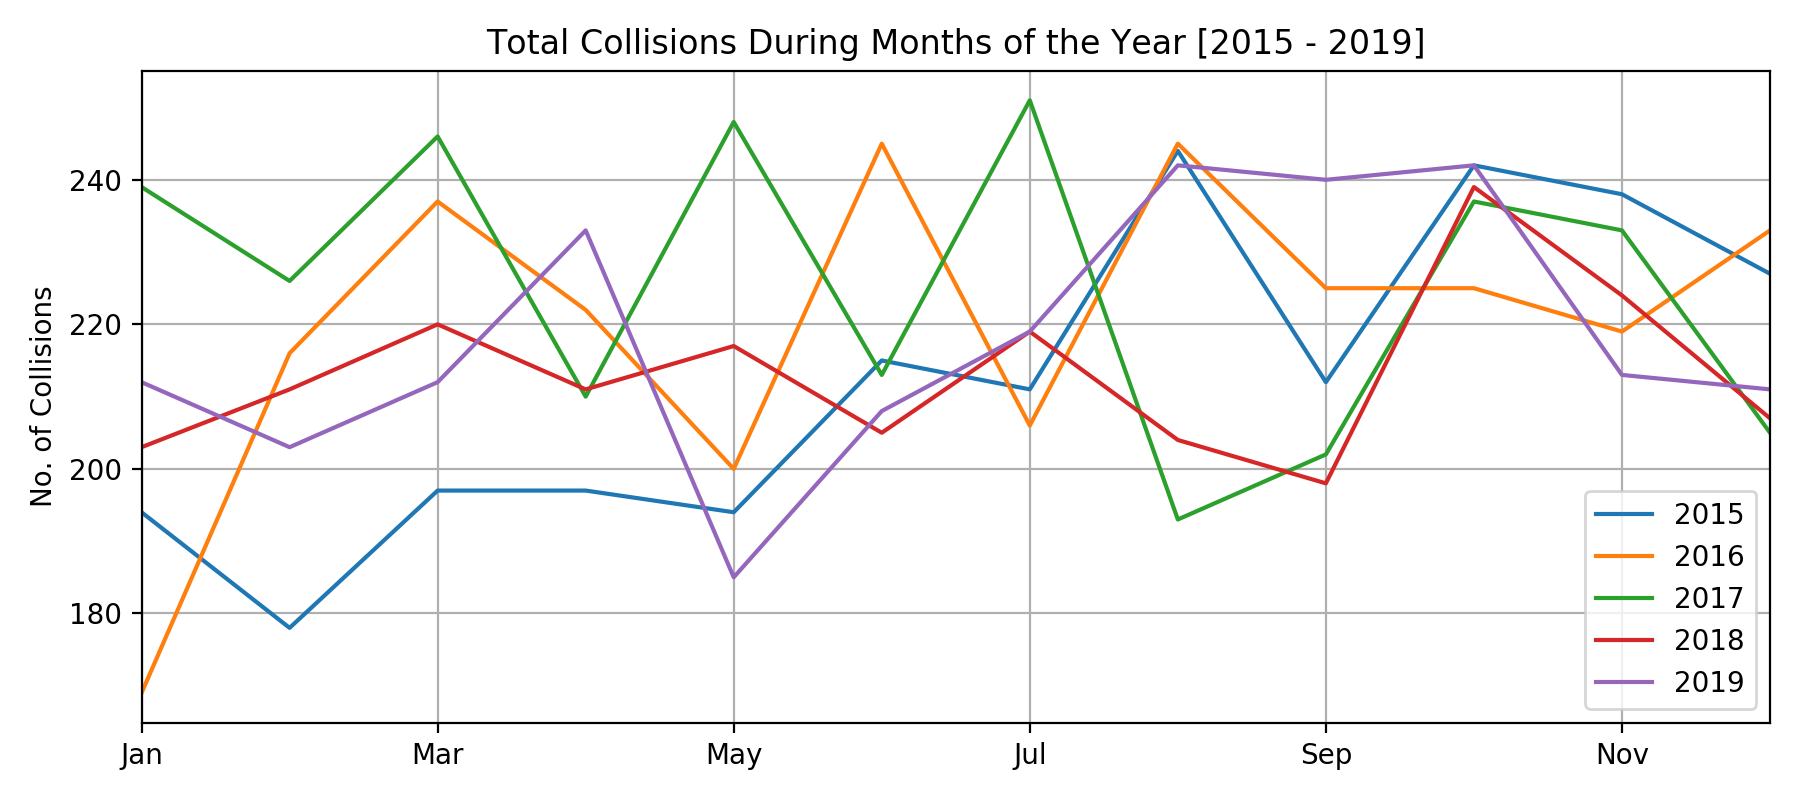

In [51]:
months = ["Jan", "Feb", "Mar", "Apr", "May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
yr_x_mo_fig = yr_x_mo_df.plot.line(figsize=(9,4), title="Total Collisions During Months of the Year [2015 - 2019]")
plt.ylabel("No. of Collisions")
plt.grid()
plt.tight_layout()

In [47]:
# 2015-2019 - COLLISIONS / DAYS OF THE WEEK
days_of_week = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

r15_days = yr15['Day'].value_counts()
yr16_days = yr16['Day'].value_counts()
yr17_days = yr17['Day'].value_counts()
yr18_days = yr18['Day'].value_counts()
yr19_days = yr19['Day'].value_counts()

days_df = pd.DataFrame({'2015': yr15_days,
                        '2016': yr16_days,
                        '2017': yr17_days,
                        '2018': yr18_days,
                        '2019': yr19_days})
days_df.index = days_of_week
days_df

,2015,2016,2017,2018,2019
Monday,357,314,362,385,389
Tuesday,356,356,431,380,362
Wednesday,363,415,414,400,404
Thursday,384,395,369,356,402
Friday,361,417,418,377,396
Saturday,384,349,403,371,377
Sunday,344,396,306,289,290


<IPython.core.display.Javascript object>


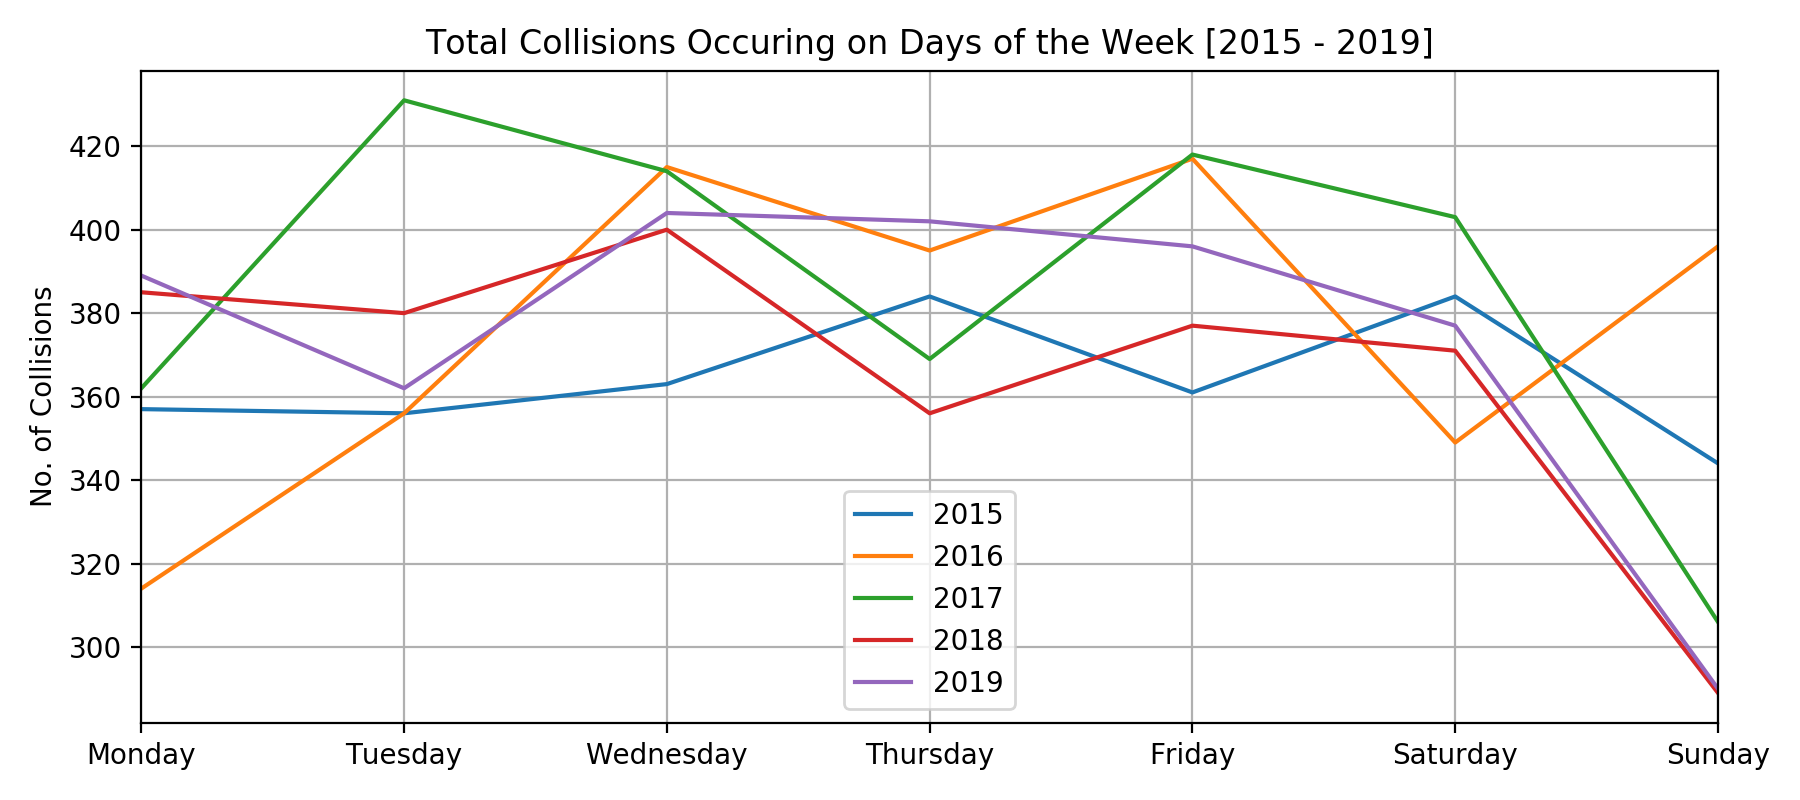

In [52]:
day_x_wk_fig = days_df.plot.line(figsize=(9,4), title="Total Collisions Occuring on Days of the Week [2015 - 2019]")
plt.ylabel("No. of Collisions")
plt.grid()
plt.tight_layout()

In [ ]:
# SLICE BY TIME PERIOD
late_night_df = traffic_df2[traffic_df2['Time Period'] == 'Midnight - 4am']
early_morning_df = traffic_df2[traffic_df2['Time Period'] == '4am - 8am']
morning_df = traffic_df2[traffic_df2['Time Period'] == '8am - 12pm']
afternoon_df = traffic_df2[traffic_df2['Time Period'] == '12pm - 4pm']
evening_df = traffic_df2[traffic_df2['Time Period'] == '4pm - 8pm']
night_df = traffic_df2[traffic_df2['Time Period'] == '8pm - Midnight']

In [45]:
# 2015-2019 - COLLISIONS / PERIODS OF THE DAY
periods_df = ['Early Morning','Morning','Afternoon','Evening','Night','Late Nate']
yr15_period = yr15['Time Period'].value_counts()
yr16_period = yr16['Time Period'].value_counts()
yr17_period = yr17['Time Period'].value_counts()
yr18_period = yr18['Time Period'].value_counts()
yr19_period = yr19['Time Period'].value_counts()

periods_df = pd.DataFrame({'2015': yr15_period,
                        '2016': yr16_period,
                        '2017': yr17_period,
                        '2018': yr18_period,
                        '2019': yr19_period})
periods_df

,2015,2016,2017,2018,2019
Midnight - 4am,260,270,231,260,240
4am - 8am,208,202,228,235,258
8am - 12pm,459,501,513,446,439
12pm - 4pm,614,618,611,588,605
4pm - 8pm,618,649,692,627,630
8pm - Midnight,390,402,428,402,448


<IPython.core.display.Javascript object>


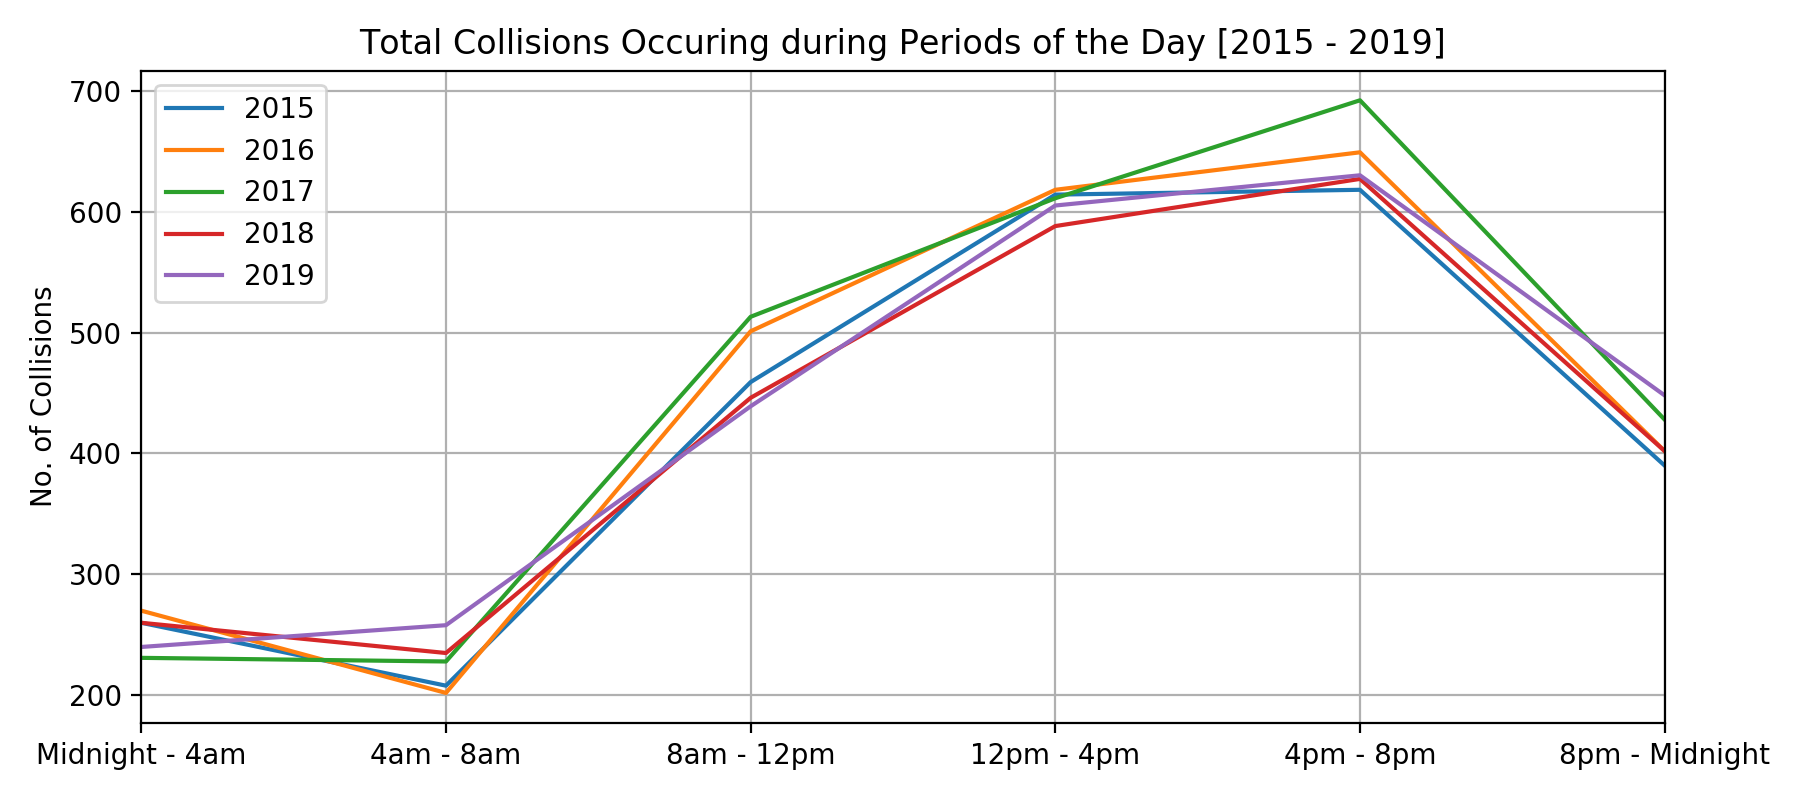

In [64]:
period_x_day_fig = periods_df.plot.line(figsize=(9,4), title="Total Collisions Occuring during Periods of the Day [2015 - 2019]")
plt.ylabel("No. of Collisions")
plt.grid()
plt.tight_layout()

In [21]:
# # 2018 Statistics
# quartiles = time_df['2018'].quantile([.25,.5,.75])
# lowerq = quartiles[0.25]
# upperq = quartiles[0.75]
# iqr = upperq-lowerq

# print(f"The lower quartile is: {lowerq}")
# print(f"The upper quartile is: {upperq}")
# print(f"The interquartile range  is: {iqr}")
# print(f"The median is: {quartiles[0.5]} ")

# lower_bound = lowerq - (1.5*iqr)
# upper_bound = upperq + (1.5*iqr)
# print(f"Values below {lower_bound} could be outliers.")
# print(f"Values above {upper_bound} could be outliers.")